# PhData Challenge

This notebook will follow the CRISP-DM Process for Machine Learning Projects format.

# 1. Business Understanding



You have been contracted by a tax firm to help them sell tax preparation software. They have built a dataset over the last 2 years of customer information and recorded whether they were able to
sell successfully to each customer.

They want to understand this data and build a model to predict if they will be able to successfully sell their software to a given individual.

Some of the column names are descriptive, but many are not.

The quality of the data cannot be guaranteed, so there may be errors or otherwise dirty data.


# 2. Data Understanding

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import roc_curve, auc

## 2.1 Loading initial data

In [2]:
raw_data_df = pd.read_csv("project_data.csv")

In [3]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              41188 non-null  int64  
 1   b1               41188 non-null  object 
 2   b2               40198 non-null  object 
 3   c10              41188 non-null  object 
 4   c3               41188 non-null  object 
 5   c4               41188 non-null  object 
 6   c8               5625 non-null   object 
 7   dow              41188 non-null  object 
 8   employment       41188 non-null  object 
 9   i1               41188 non-null  float64
 10  i2               41188 non-null  float64
 11  i3               41188 non-null  float64
 12  i4               41188 non-null  float64
 13  i5               41188 non-null  float64
 14  marriage-status  41108 non-null  object 
 15  month            41188 non-null  object 
 16  n2               41188 non-null  int64  
 17  n3          

## 2.2 Describing Data

### 2.2.1 General analysis

In [4]:
raw_data_df.shape

(41188, 23)

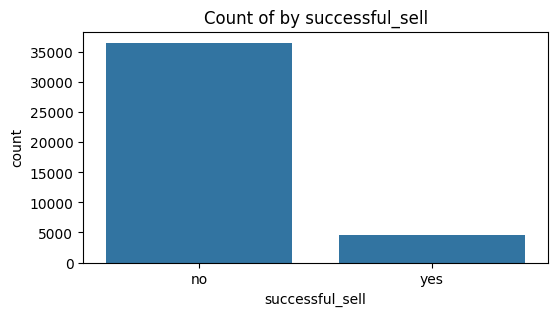

In [5]:
plt.figure(figsize=(6, 3))
sns.countplot(x='successful_sell', data=raw_data_df)
plt.title(f'Count of by successful_sell')
plt.show()

In [6]:
raw_data_df['successful_sell'].value_counts()

no     36548
yes     4640
Name: successful_sell, dtype: int64

In [7]:
raw_data_df.isnull().sum()

age                    0
b1                     0
b2                   990
c10                    0
c3                     0
c4                     0
c8                 35563
dow                    0
employment             0
i1                     0
i2                     0
i3                     0
i4                     0
i5                     0
marriage-status       80
month                  0
n2                     0
n3                     0
n4                     0
n5                     0
n6                     0
school              1731
successful_sell        0
dtype: int64

Note:
- This shows the "No" class is much more prevalent than the "Yes" class. In this context, the dataset is considered to be imbalanced.
- Four variables with missing values. Variable "c8" with nearly 86% of missing values.


### 2.2.2 Numeric variables

In [8]:
raw_data_df.describe()

,age,i1,i2,i3,i4,i5,n2,n3,n4,n5,n6
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.081886,93.575664,-40.502600,3.621291,5167.035911,2.567593,745.142032,962.475454,-0.000074,0.172963
std,10.42125,1.570960,0.578840,4.628198,1.734447,72.251528,2.770014,144.246196,186.910907,0.997024,0.494901
min,17.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,1.000000,500.000000,0.000000,-4.354231,0.000000
25%,32.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,1.000000,620.000000,999.000000,-0.679725,0.000000
50%,38.00000,1.100000,93.749000,-41.800000,4.857000,5191.000000,2.000000,750.000000,999.000000,0.001357,0.000000
75%,47.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000,3.000000,870.000000,999.000000,0.673380,0.000000
max,98.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000,56.000000,990.000000,999.000000,4.547729,7.000000


### 2.2.2.1 Distributions exploration

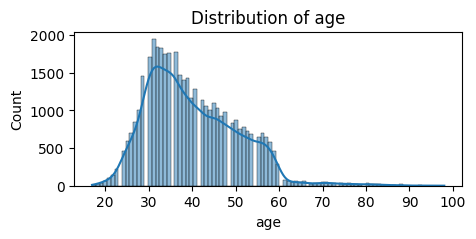

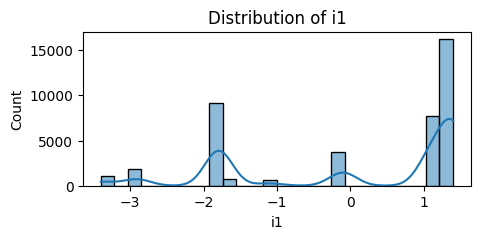

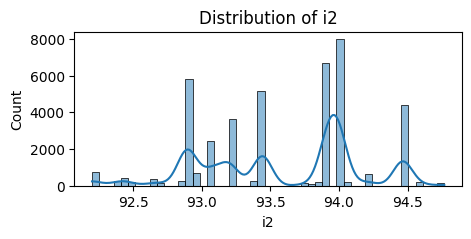

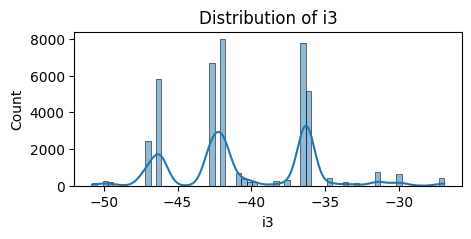

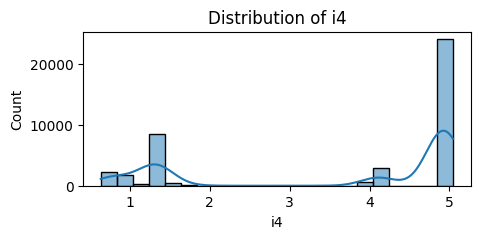

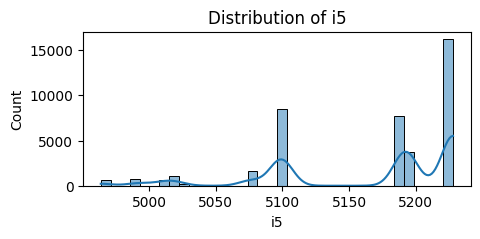

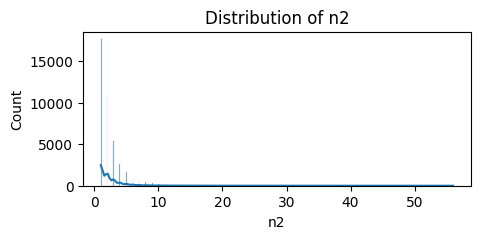

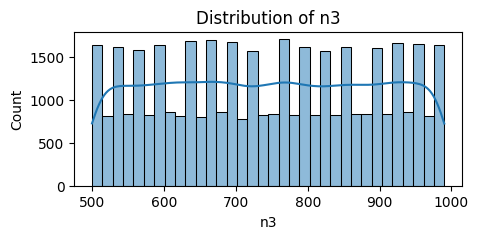

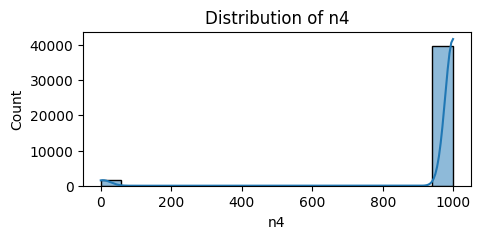

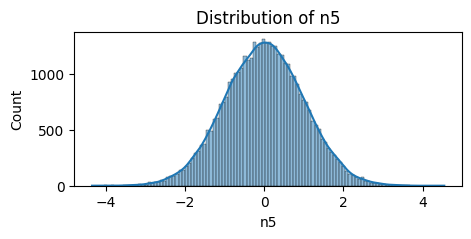

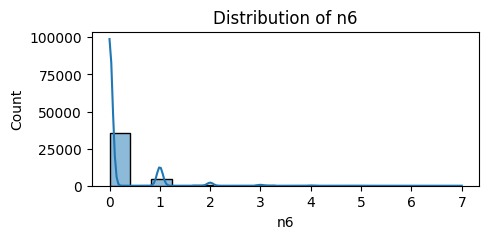

In [9]:
# Loop through each numerical variable and plot a histogram
numerical_vars = raw_data_df.select_dtypes(include=['float64', 'int64']).columns

for var in numerical_vars:
    plt.figure(figsize=(5, 2))
    sns.histplot(raw_data_df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

Note:
- This shows that these variables have different distributions. Should be standarized first to then be used in subsequent models.

#### 2.2.2.2 Variables Correlation

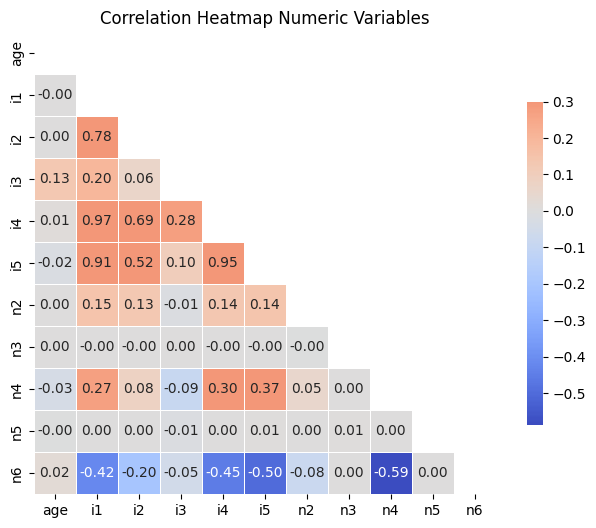

In [10]:
numerical_features = raw_data_df.select_dtypes(include=['float64', 'int64'])
corr = numerical_features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot=True,fmt=".2f")

plt.title('Correlation Heatmap Numeric Variables')
plt.show()

Note:
- The Diagonal Correlation Matrix shows:
  - There is a strong positive correlation between i5, i4, and i1.
  - There is a negative correlation between n6 and n4, i5, and i4.



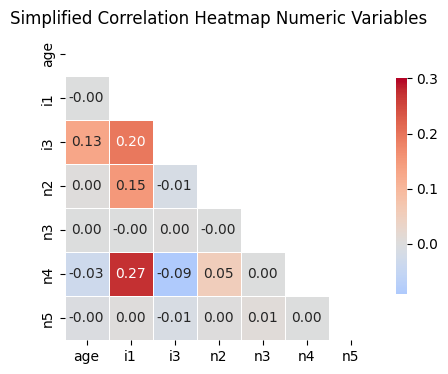

In [11]:
#Removing correlated features to see correlation matrix impact
numerical_features.pop('i2')
numerical_features.pop('i4')
numerical_features.pop('i5')
numerical_features.pop('n6')

corr = numerical_features.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6, 4))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7}, annot=True,fmt=".2f")

plt.title('Simplified Correlation Heatmap Numeric Variables')
plt.show()

Note:
- Removed correlated features: i2, i4, i5, n6.

### 2.2.3 Categorical variables

In [12]:
raw_data_df.describe(include=[object])

,b1,b2,c10,c3,c4,c8,dow,employment,marriage-status,month,school,successful_sell
count,41188,40198,41188,41188,41188,5625,41188,41188,41108,41188,39457,41188
unique,3,2,2,3,2,2,5,12,3,10,7,2
top,yes,no,no,False,new,no,thu,assistant,married,may,5 - a lot,no
freq,21576,33950,36548,32588,26144,4252,8623,10422,24928,13769,12168,36548


In [13]:
raw_data_df.employment.value_counts()

assistant           10422
laborer              9254
engineer             6743
customer service     3969
management           2924
leisure              1720
hobbyist             1456
self-employed        1421
cleaner              1060
none                 1014
student               875
unknown               330
Name: employment, dtype: int64

In [14]:
raw_data_df.school.value_counts()

5 - a lot              12168
4 - average amount      9515
3 - a bit more          6045
5 - a decent amount     5243
1 - almost none         4176
2 - a little bit        2292
0 - none                  18
Name: school, dtype: int64

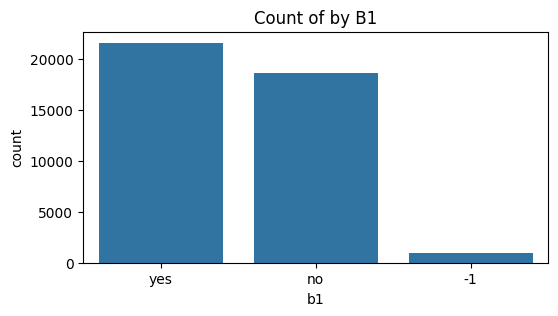

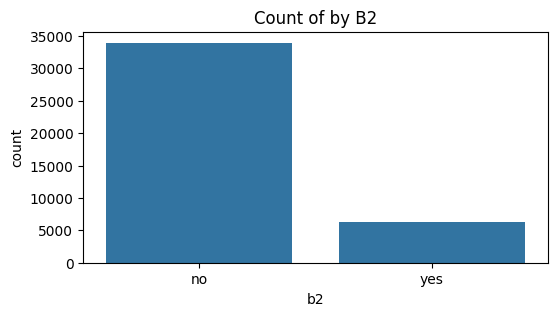

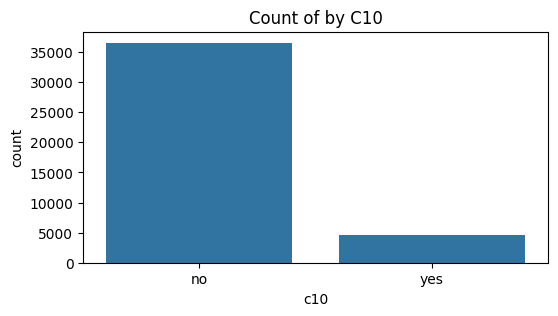

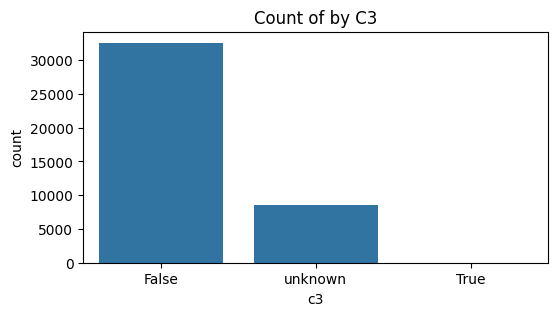

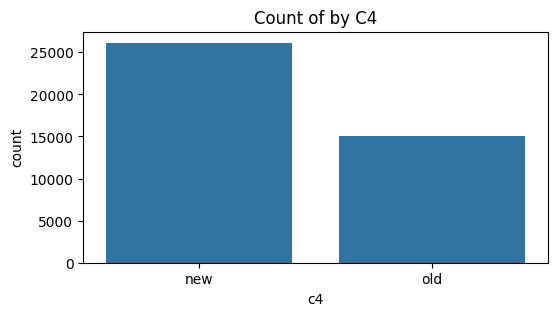

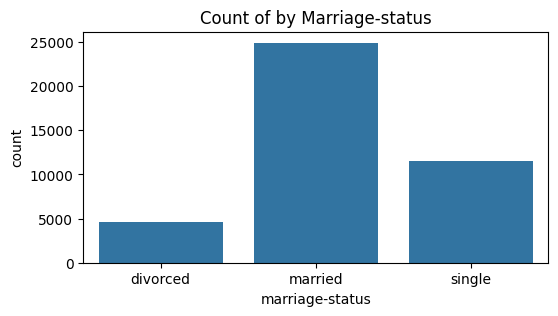

In [15]:
categorical_vars = ['b1', 'b2', 'c10', 'c3', 'c4','marriage-status']

# Loop through the list and create a count plot for each variable
for var in categorical_vars:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=var, data=raw_data_df)
    plt.title(f'Count of by {var.capitalize()}')
    plt.show()

# 3. Data Preparation

The following will prepare the dataset for the training and test set.
Here there will be several steps, and Scikit learn pipelines will be used for encapsulation, and reproducibility.

The first step will be to remove correlated variables, variables with large percentage of missing values, and date variables that could introduce some bias in our predictions.

As we have other categorical variables with some missing values, a defualt value will be imputed.

## 3.1 Pipeline Creation

In [16]:
def first_step_cleaning(df):
    df = df.drop(columns=['i2', 'i4', 'i5', 'n4', 'c8', 'dow', 'month'])
    df.fillna('unk', inplace=True)
    return df

def second_step_encondig(df):
  school_catgs = [
        ['unk', '0 - none', '1 - ', '1 - almost none', '2 - a little bit',
         '3 - a bit more', '4 - average amount', '5 - a decent amount', '5 - a lot']
    ]
  encoder = OrdinalEncoder(categories=school_catgs)
  df['school_encoded'] = encoder.fit_transform(df[['school']])
  df = df.drop(columns=['school'])

  df['successful_sell'] = df['successful_sell'].map({'no': 0, 'yes': 1})
  return df


filtered_df = first_step_cleaning(raw_data_df)
filtered_df = second_step_encondig(filtered_df)

# Removing target variable from dataset
X = filtered_df.drop('successful_sell', axis=1)
y = filtered_df['successful_sell']

numeric_features_final = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = ['b1', 'b2', 'c10', 'c3', 'c4', 'employment', 'marriage-status']

# Define Pipelines for numeric and categorical transformations
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unk')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',drop='if_binary'))
])

# Define the preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features_final),
    ('cat', categorical_transformer, categorical_features)
])

# Create the final pipeline with preprocessing
final_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor)
])

## 3.2 Dataset split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_pipeline.fit(X_train)

X_train_processed = final_pipeline.transform(X_train)
X_test_processed = final_pipeline.transform(X_test)

# 4. Modeling

## 4.1 Baseline model

A baseline model will be trained and test which are the most important features to predict the target variable.

[Text(0.5, 0.75, 'x[14] <= 0.5\ngini = 0.2\nsamples = 32950\nvalue = [29238, 3712]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 29238\nvalue = [29238, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 3712\nvalue = [0, 3712]')]

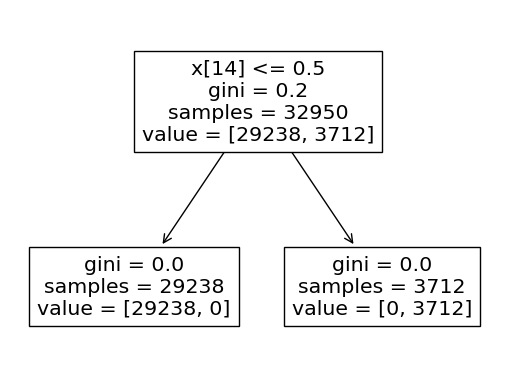

In [24]:
model = tree.DecisionTreeClassifier()
model.fit(X_train_processed, y_train)

tree.plot_tree(model)

In [25]:
feature_names = final_pipeline.named_steps['preprocess'].get_feature_names_out()
feature_index = 14
actual_feature_name = feature_names[feature_index]
print(f"The feature name for 'x[{feature_index}]' is: {actual_feature_name}")

The feature name for 'x[14]' is: cat__c10_yes


Note: The feature cat__c10_yes splits in a perfect way the two classes in the training set.

## 4.2 Strong model

We are going to create another model, but the baseline model is already too good.

In [26]:

rf_model = RandomForestClassifier(n_estimators=10, random_state=42)
rf_model.fit(X_train_processed, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

## 5. Evaluation and Performance metrics

We are going to use the AUC ROC which is commonly use for imabalanced problems as a performance metric and to compare both models in the test set.

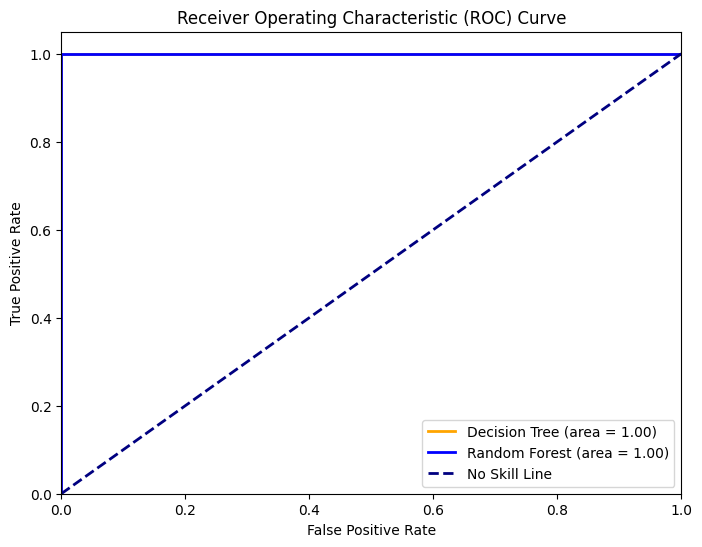

In [30]:
y_proba_lr = model.predict_proba(X_test_processed)[:, 1]
y_proba_rf = rf_model.predict_proba(X_test_processed)[:, 1]


fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr,pos_label=1)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf,pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
lw = 2  # Line width
plt.plot(fpr_lr, tpr_lr, color='orange', lw=lw, label='Decision Tree (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='No Skill Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Final note: As we can see, both models manage to perfectly predict the target variable.